## 1. CSV 데이터 가져오기

* movie_df : 영화에 대한 정보
* genre_df : 영화 별 장르에 대한 정보
* rating_df : 영화에 대한 별점 정보
* 데이터 출처 - grouplens movielens dataset

In [1]:
# $pip install tensorflow
# $pip install matplotlib
# $pip install pandas
# $pip install pillow (-> PIL)

In [2]:
# 필요한 라이브러리 가져오기
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.utils import get_file

# 영화 포스터를 가져와 주피터에서 볼 수 있도록 만들어주는 메소드
def display_posters(movieId_list):
    import requests
    from io import BytesIO
    from PIL import Image
    
    def get_poster(movieId):
        url = "https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/img/POSTER_20M_FULL/{}.jpg".format(movieId)
        try:
            response = requests.get(url)
            b = BytesIO(response.content)
            img = np.asarray(Image.open(b))
        except:
            img = np.zeros((200,100,3))
        return img
    
    images = []
    for i in movieId_list:
        img = get_poster(i)
        images.append(img)

    columns = 5
    rows = (len(movieId_list) - 1) // columns + 1
    fig, axes = plt.subplots(rows, columns)
    axes = axes.flatten()
    fig.set_size_inches((20,rows * 5))
        
    for ind, img in enumerate(images):
        c_id = ind % columns
        r_id = ind // columns
        ax = axes[r_id*columns + c_id]
        ax.set_title(movieId_list[ind])
        ax.imshow(img)

    plt.tight_layout()

In [3]:
ROOT_URL = "https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/datasets"

movie_path = get_file("movies.csv", os.path.join(ROOT_URL, "movies.csv"))
movie_df = pd.read_csv(movie_path)

genre_path = get_file("genres.csv", os.path.join(ROOT_URL, "genres.csv"))
genre_df = pd.read_csv(genre_path)

rating_path = get_file("ratings.csv", os.path.join(ROOT_URL, "ratings.csv"))
rating_df = pd.read_csv(rating_path)

# 2. Movie-Lens 데이터베이스의 테이블 확인하기

## (1) movie dataframe 확인하기

데이터 일부 가져오기

In [4]:
movie_df

,id,title,release_year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995
...,...,...,...
27273,131254,Kein Bund für's Leben,2007
27274,131256,"Feuer, Eis & Dosenbier",2002
27275,131258,The Pirates,2014
27276,131260,Rentun Ruusu,2001


전체 행 갯수 확인하기

In [5]:
movie_df.id.nunique()

27278

In [6]:
movie_df.title.nunique()

26213

In [7]:
movie_df.title.duplicated()
# 중복되는 경우 True, 유니크한 경우 False

0        False
1        False
2        False
3        False
4        False
         ...  
27273    False
27274    False
27275    False
27276    False
27277     True
Name: title, Length: 27278, dtype: bool

In [8]:
movie_df[movie_df.title.duplicated(False)].sort_values('title')

,id,title,release_year
26816,128878,1,2014
23829,113214,1,2013
1178,1203,12 Angry Men,1957
15253,77846,12 Angry Men,1997
13045,62383,"20,000 Leagues Under the Sea",1916
...,...,...,...
22698,108692,Yu-Gi-Oh!,1999
11692,51540,Zodiac,2007
26347,126579,Zodiac,2014
5800,5899,Zulu,1964


In [9]:
# 개봉년도 최소값 찾기
movie_df.release_year.min()

1891

In [10]:
# 개봉년도 최대값 찾기
movie_df.release_year.max()

2015

## (2) rating dataframe 확인하기

In [11]:
rating_df

,user_id,movie_id,rating,rated_at
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [12]:
# 유저 수 확인
rating_df.user_id.nunique()

138493

In [13]:
# rating된 영화의 개수
rating_df.movie_id.nunique()

26744

In [14]:
# 평점 최소값
rating_df.rating.min()

0.5

In [15]:
# 평점 최대값
rating_df.rating.max()

5.0

## (3) genre dataframe 확인하기

In [16]:
genre_df

,movie_id,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
...,...,...
54401,131258,Adventure
54402,131260,(no genres listed)
54403,131262,Adventure
54404,131262,Fantasy


In [17]:
genre_df.genre.unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [18]:
genre_df.genre.nunique()

20

In [19]:
# 장르별 데이터 수 확인하기
genre_df.genre.value_counts()

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
Name: genre, dtype: int64


# 데이터 탐색
## 1. 각 테이블에 대한 주요 통계정보 확인
### (1) movies

In [20]:
# 데이터 내 연도 범위
movie_df.release_year.describe()
# 생성한 데이터프레임의 간단한 통계정보를 보여주는 메소드

count    27278.000000
mean      1989.383239
std         23.332644
min       1891.000000
25%       1976.000000
50%       1998.000000
75%       2008.000000
max       2015.000000
Name: release_year, dtype: float64

In [21]:
movie_df.release_year.value_counts()
# 제일 큰 값이 상단에 위치

2009    1114
2012    1022
2011    1017
2013    1012
2008     980
        ... 
1905       1
1902       1
1899       1
1903       1
1891       1
Name: release_year, Length: 118, dtype: int64

In [22]:
movie_df.release_year.value_counts().sort_index()

1891       1
1893       1
1894       2
1895       2
1896       2
        ... 
2011    1017
2012    1022
2013    1012
2014     746
2015     121
Name: release_year, Length: 118, dtype: int64

막대 그래프로 영화 갯수 시각화

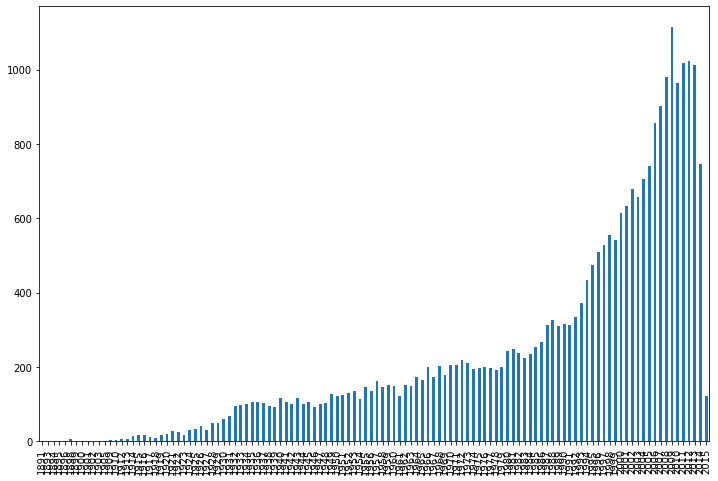

In [23]:
movie_df.release_year.value_counts().sort_index().plot(kind='bar',figsize=(12,8))

### (2) genre

In [24]:
# 장르 별 영화 개수 - 내림차순
genre_df.genre.value_counts().sort_values()

IMAX                    196
(no genres listed)      246
Film-Noir               330
Western                 676
Animation              1027
Musical                1036
Children               1139
War                    1194
Fantasy                1412
Mystery                1514
Sci-Fi                 1743
Adventure              2329
Documentary            2471
Horror                 2611
Crime                  2939
Action                 3520
Romance                4127
Thriller               4178
Comedy                 8374
Drama                 13344
Name: genre, dtype: int64

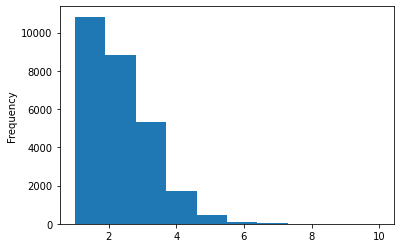

In [25]:
# 히스토그램으로 시각화
genre_df.movie_id.value_counts().plot(kind='hist')

In [26]:
genre_df.movie_id.value_counts().value_counts()

1     10829
2      8809
3      5330
4      1724
5       477
6        83
7        20
8         5
10        1
Name: movie_id, dtype: int64

In [27]:
# 비율로 보기
genre_df.movie_id.value_counts().value_counts() / len(movie_df) * 100

1     39.698658
2     32.293423
3     19.539556
4      6.320111
5      1.748662
6      0.304275
7      0.073319
8      0.018330
10     0.003666
Name: movie_id, dtype: float64

### (3) rating

In [28]:
# 시간정보를 `datatime` 포맷으로 변환
pd.to_datetime(rating_df.rated_at,unit='s')

0          2005-04-02 23:53:47
1          2005-04-02 23:31:16
2          2005-04-02 23:33:39
3          2005-04-02 23:32:07
4          2005-04-02 23:29:40
                   ...        
20000258   2009-11-13 15:42:00
20000259   2009-12-03 18:31:48
20000260   2009-12-07 18:10:57
20000261   2009-11-13 15:42:24
20000262   2009-10-17 20:25:36
Name: rated_at, Length: 20000263, dtype: datetime64[ns]

In [29]:
rating_df.rated_at = pd.to_datetime(rating_df.rated_at,unit='s')
rating_df.rated_at.dt.year

0           2005
1           2005
2           2005
3           2005
4           2005
            ... 
20000258    2009
20000259    2009
20000260    2009
20000261    2009
20000262    2009
Name: rated_at, Length: 20000263, dtype: int64

In [30]:
# 연도별 별점 구하기
rating_df.rated_at.dt.year.value_counts().sort_index()

1995          4
1996    1612609
1997     700982
1998     308070
1999    1198384
2000    1953659
2001    1186125
2002     869719
2003    1035878
2004    1170049
2005    1803158
2006    1171836
2007    1053430
2008    1158777
2009     930036
2010     903691
2011     766366
2012     731389
2013     599327
2014     562888
2015     283886
Name: rated_at, dtype: int64

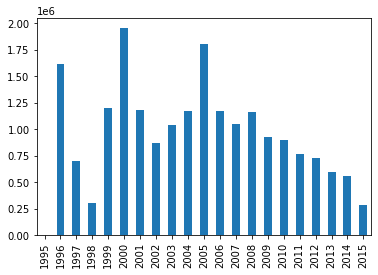

In [31]:
# 연도별 별점 시각화
rating_df.rated_at.dt.year.value_counts().sort_index().plot(kind='bar')

In [32]:
# 유저 별 평균 선호도
rating_df.groupby('user_id')['rating'].mean()

user_id
1         3.742857
2         4.000000
3         4.122995
4         3.571429
5         4.272727
            ...   
138489    3.986842
138490    3.556291
138491    2.681818
138492    4.097561
138493    4.172922
Name: rating, Length: 138493, dtype: float64

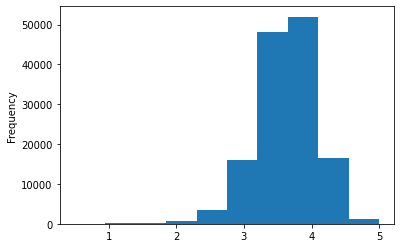

In [33]:
rating_df.groupby('user_id')['rating'].mean().plot(kind='hist')

# 비개인화 추천
## 1. 최신 아이템 추천

In [34]:
movie_df[movie_df.release_year == movie_df.release_year.max()].sample(10)

,id,title,release_year
27116,130462,The Boy,2015
27006,129826,LEGO DC Comics Super Heroes: Justice League vs...,2015
26750,128614,Nobody Wants the Night,2015
26528,127212,The Stanford Prison Experiment,2015
27045,129937,Run All Night,2015
25491,120637,Blackhat,2015
26494,127136,True Story,2015
27167,130840,Spring,2015
27067,130069,Road Hard,2015
26603,127610,Average Italian,2015


In [35]:
top_movies_ids = rating_df.groupby('movie_id')['rating'].mean().sort_values(ascending=False).iloc[:10]

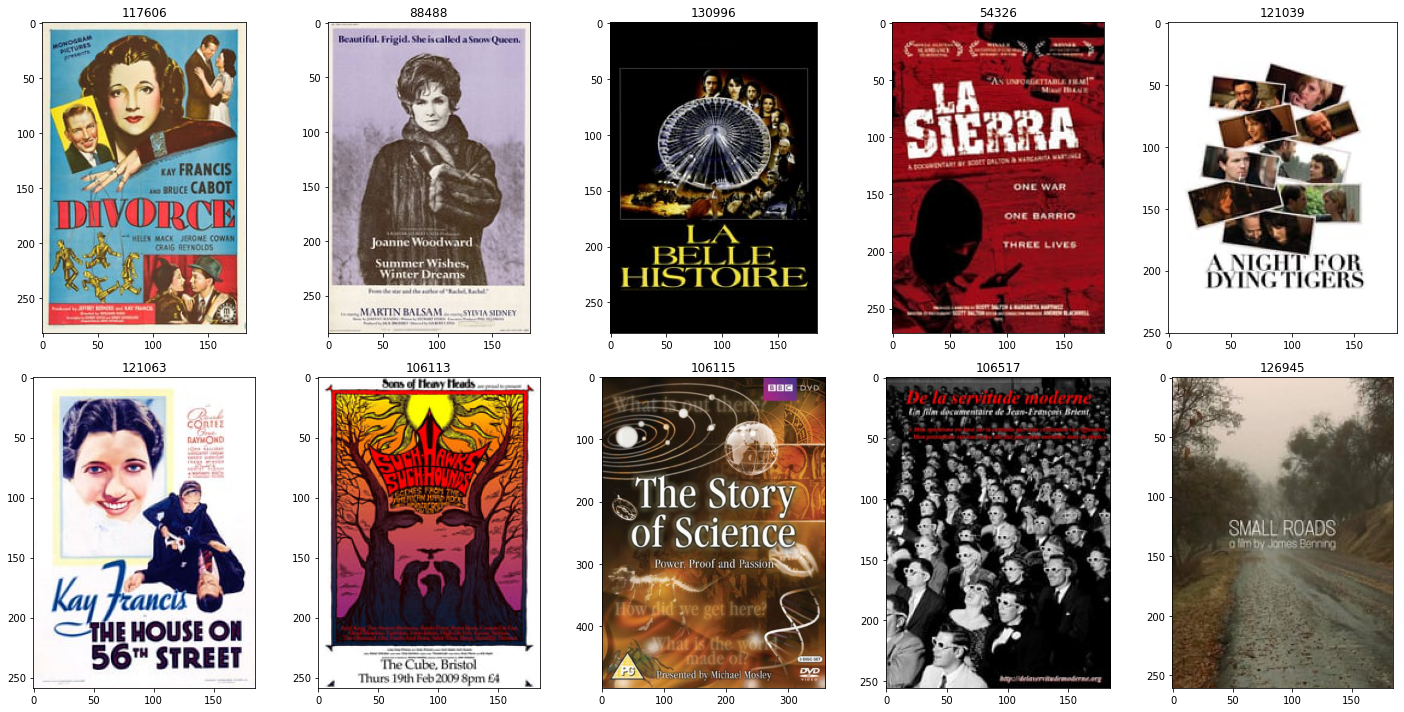

In [36]:
display_posters(top_movies_ids.index)

In [37]:
rating_df[rating_df.movie_id.isin(top_movies_ids.index)]

,user_id,movie_id,rating,rated_at
4246283,28916,126945,5.0,2015-01-30 12:59:10
4436494,30317,88488,5.0,2014-05-10 15:42:48
4588742,31411,130996,5.0,2015-03-28 14:07:51
11178158,77204,117606,5.0,2015-01-12 03:56:26
11178160,77204,121063,5.0,2015-01-12 03:56:31
12790440,88397,106113,5.0,2013-11-06 03:44:00
12839685,88738,106115,5.0,2013-11-06 12:53:45
13841058,95614,54326,5.0,2009-02-06 23:28:57
15226167,105227,121039,5.0,2015-01-07 00:59:41
17018992,117718,106517,5.0,2013-11-22 21:29:10


In [38]:
# 300개 이상의 평점을 받은 영화 중 상위 10개
count_per_movie = rating_df.movie_id.value_counts()

In [39]:
over300_movies = count_per_movie[count_per_movie>=300].index

In [41]:
top_movies_ids = rating_df[rating_df.movie_id.isin(over300_movies)].groupby('movie_id')['rating'].mean().sort_values(ascending=False).iloc[:10]

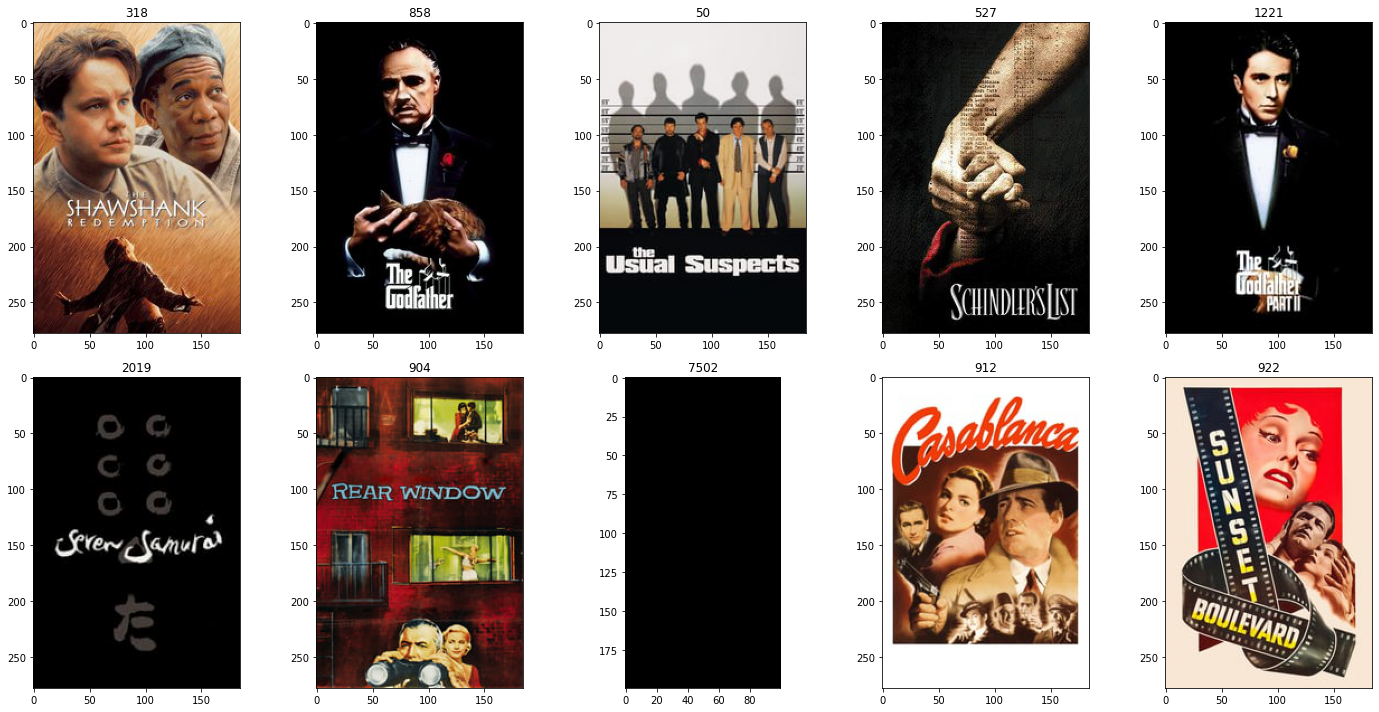

In [43]:
display_posters(top_movies_ids.index)

In [ ]:
comedy_movie_ids = genregenre_df.genre == 'Comedy'

In [ ]:
# 300개 평점을 받은 영화 중에 Comedy 상위 랭킹 10개
top_movies_ids = rating_df[rating_df.movie_id.isin(over300_movies)& rating_df.movie_id.isin(comedy_movie_ids)
                          ].groupby('movie_id')['rating'].mean().sort_values(ascending=False).iloc[:10]